# Gaussian-based SMOTE algorithm
Gaussian-based SMOTE to solve the class imbalance problem in machine learning. This method combines the SMOTE algorithm with a Gaussian probability distribution to generate synthetic minority class samples.

In this algorithm:

  1. We generate a synthetic dataset using make_classification with a class imbalance.
  2. Normalize the dataset.
  3. Apply Gaussian-based SMOTE to create synthetic samples.
  Combine the original and synthetic samples.
  4. Train a KNN classifier.
  5. Evaluate and visualize the results.

### Step 1: Import Libraries and Create Dataset

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.1, 0.9], flip_y=0, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 2: Define KNN and Gaussian-Based SMOTE

In [11]:
# Define the KNN model for finding neighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_scaled)

# Define the Gaussian-based SMOTE function
def gaussian_smote(X, y, k=5, sigma=1.0):
    # Initialize the synthetic samples list
    synthetic_samples = []

    # Find the minority class (assuming binary classification with 0 as minority class)
    minority_class = 0

    # Iterate over each minority class sample
    for i in range(len(y)):
        if y[i] == minority_class:  # Minority class
            # Find the k nearest neighbors
            neighbors = knn.kneighbors(X[i].reshape(1, -1), return_distance=False)[0]

            for j in neighbors:
                if j != i:
                    # Calculate the difference between the minority sample and its neighbor
                    dif = X[j] - X[i]

                    # Generate a random value from a Gaussian distribution
                    range_val = np.random.normal(0, sigma)

                    # Generate the synthetic sample
                    synthetic_sample = X[i] + range_val * dif

                    # Append the synthetic sample to the list
                    synthetic_samples.append(synthetic_sample)

    # Convert the list to a numpy array
    synthetic_samples = np.array(synthetic_samples)

    return synthetic_samples

# Generate synthetic samples
synthetic_samples = gaussian_smote(X_scaled, y)

# Append the synthetic samples to the original data
X_augmented = np.concatenate((X_scaled, synthetic_samples), axis=0)
y_augmented = np.concatenate((y, np.zeros(len(synthetic_samples))), axis=0)

### Step 3: Train and Evaluate the Model

In [12]:
# Define a classifier model (using KNN for simplicity)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_augmented, y_augmented)

# Evaluate the model
y_pred = classifier.predict(X_augmented)
print("Accuracy:", accuracy_score(y_augmented, y_pred))
print("Classification Report:")
print(classification_report(y_augmented, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_augmented, y_pred))



Accuracy: 0.9692857142857143
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       500
         1.0       0.99      0.96      0.98       900

    accuracy                           0.97      1400
   macro avg       0.96      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400

Confusion Matrix:
[[492   8]
 [ 35 865]]


### Step 4: Visualize the Results


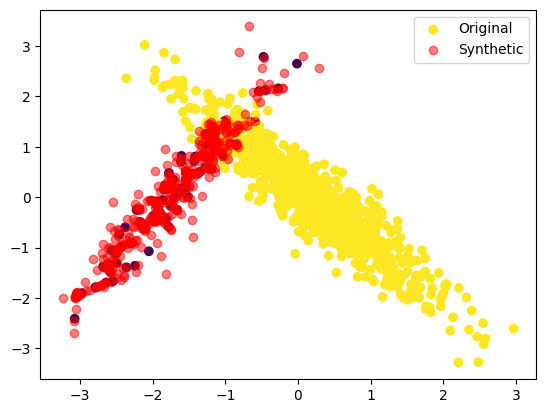

In [13]:
# Visualize the results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, label='Original')
plt.scatter(synthetic_samples[:, 0], synthetic_samples[:, 1], c='r', label='Synthetic', alpha=0.5)
plt.legend()
plt.show()
